In [40]:
!pip install wordcloud

In [1]:
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
import string
from nltk.tokenize import TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

import emoji

from emoji_translate.emoji_translate import Translator
from emoji import emojize

# set plot style
sns.set()

In [2]:
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 500

In [3]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test_with_no_labels.csv')

## Text Cleaning

### Remove noise

The shape of the df before removing duplicates is: (15819, 3)
The shape of the df before removing duplicates is: (14229, 3)


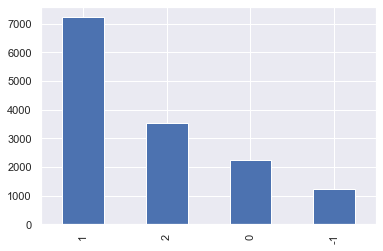

In [4]:
'''
print('The shape of the df before removing duplicates is:', df.shape)

#removing duplicates
df.drop_duplicates(subset='message',inplace=True)
print('The shape of the df before removing duplicates is:', df.shape)

df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()
'''
#This doesn't improve the model

In [4]:
def cleaning(message):

    #translate emojis
    message = emoji.demojize(message, delimiters=("", "")) 

    #lowercase
    message = message.lower()

    #replace urls
    url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    web = r'url-web'
    message = re.sub(url, web, message)
    
    #remove puncuation
    message = re.sub(r'[-]',' ',message)
    message = re.sub(r'[^\w\s]','', message)
    message = re.sub('[0-9]+','', message)
    '''
    #lemmatisation
    lemmatizer = WordNetLemmatizer()
    message = [lemmatizer.lemmatize(token) for token in message.split(' ')]
    message = [lemmatizer.lemmatize(token, 'v') for token in message]
    message = ' '.join(message)
    '''

    return message

In [5]:
#Apply data cleaning function to data
df['clean_message'] = df['message'].map(cleaning)
test['clean_message'] = test['message'].map(cleaning)

In [10]:
df

,sentiment,message,tweetid,clean_message
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what url web via mashable
1,1,It's not like we lack evidence of anthropogenic global warming,126103,its not like we lack evidence of anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,rt rawstory researchers say we have three years to act on climate change before its too late url web url web
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,todayinmaker wired was a pivotal year in the war on climate change url web
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,rt soynoviodetodas its and a racist sexist climate change denying bigot is leading in the polls electionnight
...,...,...,...,...
15814,1,"RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://…",22001,rt ezlusztig they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https
15815,2,RT @washingtonpost: How climate change could be breaking up a 200-million-year-old relationship https://t.co/rPFGvb2pLq,17856,rt washingtonpost how climate change could be breaking up a million year old relationship url web
15816,0,notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2,384248,notiven rt nytimesworld what does trump actually believe about climate change rick perry joins other aides in url web
15817,-1,RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed byÃ¢â‚¬Â¦,819732,rt sarasmiles hey liberals the climate change crap is a hoax that ties to agenda\nthe climate is being changed byãââ


# EDA

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

deny_tweets = df[df.sentiment == -1]
pro_tweets = df[df.sentiment == 1]
media_tweets = df[df.sentiment == 2]
neutral_tweets = df[df.sentiment == 0]

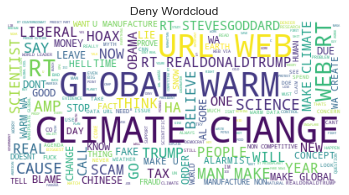

In [63]:
def wordcloud_deny(tweets):

    wordcloud = WordCloud(background_color="white",random_state = 26).generate(" ".join([i for i in deny_tweets['clean_message'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Deny Wordcloud")

wordcloud_deny(df.clean_message)  

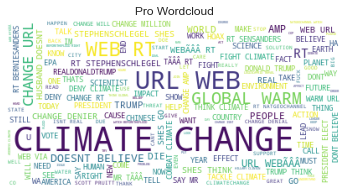

In [67]:
def wordcloud_pro(tweets):

    wordcloudpro = WordCloud(background_color="white",random_state = 26).generate(" ".join([i for i in pro_tweets['clean_message'].str.upper()]))
    plt.imshow(wordcloudpro)
    plt.axis("off")
    plt.title("Pro Wordcloud")

wordcloud_pro(pro_tweets.clean_message) 

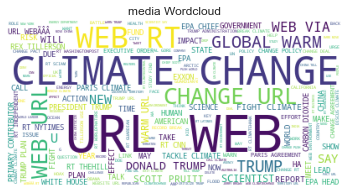

In [68]:
def wordcloud_media(tweets):

    wordcloudmedia = WordCloud(background_color="white",random_state = 26).generate(" ".join([i for i in media_tweets['clean_message'].str.upper()]))
    plt.imshow(wordcloudmedia)
    plt.axis("off")
    plt.title("media Wordcloud")

wordcloud_media(media_tweets.clean_message) 

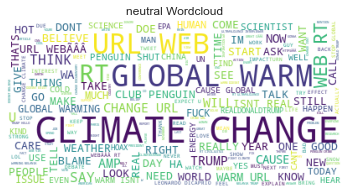

In [69]:
def wordcloud_neutral(tweets):

    wordcloudneutral = WordCloud(background_color="white",random_state = 26).generate(" ".join([i for i in neutral_tweets['clean_message'].str.upper()]))
    plt.imshow(wordcloudneutral)
    plt.axis("off")
    plt.title("neutral Wordcloud")

wordcloud_neutral(neutral_tweets.clean_message) 

### Solving the class imbalance
Upscaling the minority classes

In [13]:
df_majority = df[df['sentiment']==1] 
df_minority_0 = df[df['sentiment']==0] 
df_minority_neg1 = df[df['sentiment']==-1] 
df_minority_2 = df[df['sentiment']==2] 

In [14]:
df_minority_0_upsampled = resample(df_minority_0, replace=True, n_samples=8530, random_state=47)      
df_minority_neg1_upsampled = resample(df_minority_neg1, replace=True, n_samples=8530, random_state=47)   
df_minority_2_upsampled = resample(df_minority_2, replace=True, n_samples=8530, random_state=47)   

In [15]:
###combining all upscaled classes into a single df, df_comb
df_comb = pd.concat([df_majority, df_minority_0_upsampled, df_minority_neg1_upsampled, df_minority_2_upsampled])

#This doesn't improve the model

## Training and testing

## Models

In [7]:
X = df['clean_message']
y = df['sentiment']

X_real = test['clean_message']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=26,  shuffle = True)

In [8]:
#Using a pipeline to train the model
pipe = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words='english', 
                            min_df=1, 
                            max_df=0.9, 
                            ngram_range=(1, 2))),
                ('classification', LinearSVC())])


pipe.fit(X_train, y_train)


#Predict and evaluate
y_pred_lsvc = pipe.predict(X_test)

print('model: Linear SVC Metrics')
print(metrics.classification_report(y_test, y_pred_lsvc))

model: Linear SVC Metrics
              precision    recall  f1-score   support

          -1       0.85      0.54      0.66        65
           0       0.74      0.36      0.48       118
           1       0.76      0.91      0.83       426
           2       0.74      0.75      0.74       182

    accuracy                           0.76       791
   macro avg       0.77      0.64      0.68       791
weighted avg       0.76      0.76      0.74       791



In [75]:
#RF
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', RandomForestClassifier(n_estimators=1000))])


pipe.fit(X_train, y_train)


#Predict and evaluate
y_pred_lsvc = pipe.predict(X_test)

print('model: Linear SVC Metrics')
print(metrics.classification_report(y_test, y_pred_lsvc))




#Using a pipeline to train the model
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),
                ('classification', MLPClassifier(random_state=1, max_iter=300))])


pipe.fit(X_train, y_train)


#Predict and evaluate
y_pred_lsvc = pipe.predict(X_test)

print('model: Linear SVC Metrics')
print(metrics.classification_report(y_test, y_pred_lsvc))

model: Linear SVC Metrics
              precision    recall  f1-score   support

          -1       0.94      0.21      0.35        70
           0       0.50      0.39      0.44       119
           1       0.67      0.87      0.76       405
           2       0.82      0.65      0.73       197

    accuracy                           0.69       791
   macro avg       0.73      0.53      0.57       791
weighted avg       0.71      0.69      0.67       791

model: Linear SVC Metrics
              precision    recall  f1-score   support

          -1       0.71      0.36      0.48        70
           0       0.64      0.41      0.50       119
           1       0.73      0.87      0.80       405
           2       0.77      0.77      0.77       197

    accuracy                           0.73       791
   macro avg       0.71      0.60      0.64       791
weighted avg       0.73      0.73      0.72       791



In [12]:
#Using a pipeline to train the model
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),
                ('classification', MLPClassifier(random_state=1, max_iter=300))])


pipe.fit(X_train, y_train)


#Predict and evaluate
y_pred_lsvc = pipe.predict(X_test)

print('model: Linear SVC Metrics')
print(metrics.classification_report(y_test, y_pred_lsvc))

model: Linear SVC Metrics
              precision    recall  f1-score   support

          -1       0.79      0.43      0.56        53
           0       0.62      0.39      0.48       102
           1       0.76      0.87      0.81       380
           2       0.77      0.80      0.78       177

    accuracy                           0.75       712
   macro avg       0.73      0.62      0.66       712
weighted avg       0.74      0.75      0.74       712

C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [76]:
#GBC
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', GradientBoostingClassifier(n_estimators=3000))])
pipe.fit(X_train, y_train)
y_pred_lsvc = pipe.predict(X_test)
print('model: GradientBoost Metrics')
print(metrics.classification_report(y_test, y_pred_lsvc))


KeyboardInterrupt: 

In [9]:
#Create perdicted sentiment for real data
X_real = test['clean_message']

y_pred_lsvc_real = pipe.predict(X_real)

test['sentiment'] = y_pred_lsvc_real

In [10]:
#Save output to csv
test[['tweetid','sentiment']].to_csv('LVC_Pipeline_no_upsampling_lemma_strat=y.csv', index=False)

In [68]:
#Using a pipeline to train the model
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', LinearSVC())])
pipe.fit(X_train, y_train)
y_pred_lsvc = pipe.predict(X_test)

#LogisticRegression
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', LogisticRegression(solver='lbfgs'))])
pipe.fit(X_train, y_train)
y_pred_lsvc = pipe.predict(X_test)
print('model: LogisticRegression Metrics')
print(metrics.classification_report(y_test, y_pred_lsvc))

#KNeighborsClassifier
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', KNeighborsClassifier())])
pipe.fit(X_train, y_train)
y_pred_lsvc = pipe.predict(X_test)
print('model: LKNeighbours Metrics')
print(metrics.classification_report(y_test, y_pred_lsvc))

#SVC
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', SVC(probability=True, kernel='linear'))])
pipe.fit(X_train, y_train)
y_pred_lsvc = pipe.predict(X_test)
print('model: SVC Metrics')
print(metrics.classification_report(y_test, y_pred_lsvc))

#GBC
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', GradientBoostingClassifier())])
pipe.fit(X_train, y_train)
y_pred_lsvc = pipe.predict(X_test)
print('model: GradientBoost Metrics')
print(metrics.classification_report(y_test, y_pred_lsvc))

#DT
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', DecisionTreeClassifier())])
pipe.fit(X_train, y_train)
y_pred_lsvc = pipe.predict(X_test)
print('model: DecisionTree Metrics')
print(metrics.classification_report(y_test, y_pred_lsvc))


#RF
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', RandomForestClassifier())])
pipe.fit(X_train, y_train)
y_pred_lsvc = pipe.predict(X_test)
print('model: RandomForest Metrics')
print(metrics.classification_report(y_test, y_pred_lsvc))


C:\Users\stefa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
model: LogisticRegression Metrics
              precision    recall  f1-score   support

          -1       0.71      0.24      0.36        70
           0       0.62      0.30      0.41       119
           1       0.72      0.88      0.79       405
           2       0.75      0.81      0.78       197

    accuracy                           0.72       791
   macro avg       0.70      0.56      0.59       791
weighted avg       0.71      0.72      0.69       791

model: LKNeighbou

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.